In [64]:
import pandas as pd
import numpy as np

In [65]:
clients_df = pd.read_csv('data/clients2.csv')
q25, q75 = np.percentile(clients_df.age, [25,75])
intr_qr = q75 - q25
max = q75 + intr_qr*1.5
min = q25 - intr_qr*1.5
clients_df.loc[(clients_df.age > max) | (clients_df.age < min), 'age'] = np.nan
median_age = clients_df.age.median()
clients_df['age'] = clients_df['age'].fillna(median_age)

clients_df.gender = clients_df.gender.apply(lambda x: (x=='M') + 2*(x=='F'))

clients_df['first_redeem_date'] = pd.to_datetime(clients_df['first_redeem_date'], errors='coerce')
clients_df['first_reedem_ts'] = clients_df.first_redeem_date.values.view('int64') / 1e9
clients_df['first_issue_date'] = pd.to_datetime(clients_df['first_issue_date'], errors='coerce')
clients_df['first_issue_ts'] = clients_df.first_issue_date.values.view('int64')/(1e9)

In [66]:
clients_df = clients_df.drop(columns='client_id.1')

In [67]:
clients_df.first_reedem_ts = clients_df.first_reedem_ts / 1e9
clients_df.first_issue_ts = clients_df.first_issue_ts / 1e9

<AxesSubplot:>

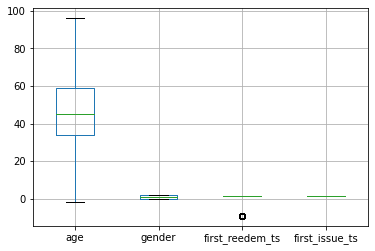

In [68]:
clients_df.boxplot()

In [69]:
clients_df.loc[clients_df.first_reedem_ts < 0, 'first_reedem_ts'] = None

In [70]:
median_reedem_ts = clients_df.first_reedem_ts.median()


In [71]:
clients_df['first_reedem_ts'] = clients_df.first_reedem_ts.fillna(median_reedem_ts)

In [72]:
clients_df.isnull().sum()

client_id                0
first_issue_date         0
first_redeem_date    17546
age                      0
gender                   0
first_reedem_ts          0
first_issue_ts           0
dtype: int64

<AxesSubplot:>

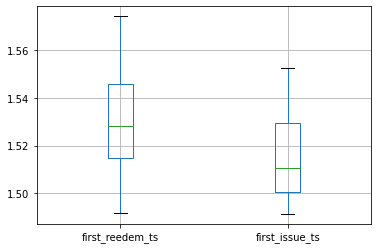

In [73]:
clients_df.loc[:, ['first_reedem_ts', 'first_issue_ts']].boxplot()

In [74]:
clients_df.to_csv('data/cleaned_cliens.csv', index=False)